<a href="https://colab.research.google.com/github/Parnika457/Parnika-Singh-ML-assignment/blob/master/EDA_ASSIGNMENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EDA

Hi everyone, This is your first assignment for week 1...
So in this assignment you have to perform EDA on the below dataset.
The problem statements are given below.
Just write a code for them...

In [ ]:
!wget https://www.kaggle.com/datasets/aestheteaman01/zomato-restaurants-in-delhi-ncr


--2023-09-09 13:43:50--  https://www.kaggle.com/datasets/aestheteaman01/zomato-restaurants-in-delhi-ncr
Resolving www.kaggle.com (www.kaggle.com)... 35.244.233.98
Connecting to www.kaggle.com (www.kaggle.com)|35.244.233.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘zomato-restaurants-in-delhi-ncr’

zomato-restaurants-     [ <=>                ]  15.94K  --.-KB/s    in 0.001s  

2023-09-09 13:43:50 (23.8 MB/s) - ‘zomato-restaurants-in-delhi-ncr’ saved [16322]



Q1.Are there any null values in the dataset?if yes then fill them..

In [39]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

data=pd.read_csv("hello.csv")
data.isnull().sum()

Restaurant_Name            0
Category                   0
Pricing_for_2              0
Locality                   0
Dining_Rating              0
Dining_Review_Count        0
Delivery_Rating          402
Delivery_Rating_Count      0
Website                    0
Address                    0
Phone_No                   0
Latitude                   0
Longitude                  0
Known_For2               405
Known_For22              841
dtype: int64

In [40]:
data["Delivery_Rating"].value_counts()
data["Delivery_Rating"]=data["Delivery_Rating"].fillna(value=3.9)
data["Known_For2"].value_counts()
data["Known_For2"]=data["Known_For2"].fillna(value="Get a complimentary night, earn up to 50% of spends as points at 250+ restaurants & much more")
data["Known_For22"].value_counts()
data["Known_For22"]=data["Known_For22"].fillna(value="Pretty Decor, Perfect Presentation, Tamper Proof Packaging, Worth the Money, Packing, Food Quality")
data.isnull().sum()

Restaurant_Name          0
Category                 0
Pricing_for_2            0
Locality                 0
Dining_Rating            0
Dining_Review_Count      0
Delivery_Rating          0
Delivery_Rating_Count    0
Website                  0
Address                  0
Phone_No                 0
Latitude                 0
Longitude                0
Known_For2               0
Known_For22              0
dtype: int64

Q2.Which restaurant is the best one having ratings more than 4.5 for delivery


In [41]:
#data.drop(["Pricing_for_2","Locality","Website","Address","Phone_No","Latitude","Longitude","Known_For2","Known_For22"],axis=1,inplace=True)
y=data['Delivery_Rating'].value_counts()
y

3.9    706
4.0    264
4.1    253
4.2    177
3.8    140
4.3    135
3.7     99
3.6     60
3.5     50
4.4     26
3.4     20
3.3     11
4.5      8
3.2      6
3.1      5
3.0      3
2.8      1
2.9      1
Name: Delivery_Rating, dtype: int64

<Axes: xlabel='Restaurant_Name', ylabel='Delivery_Rating'>

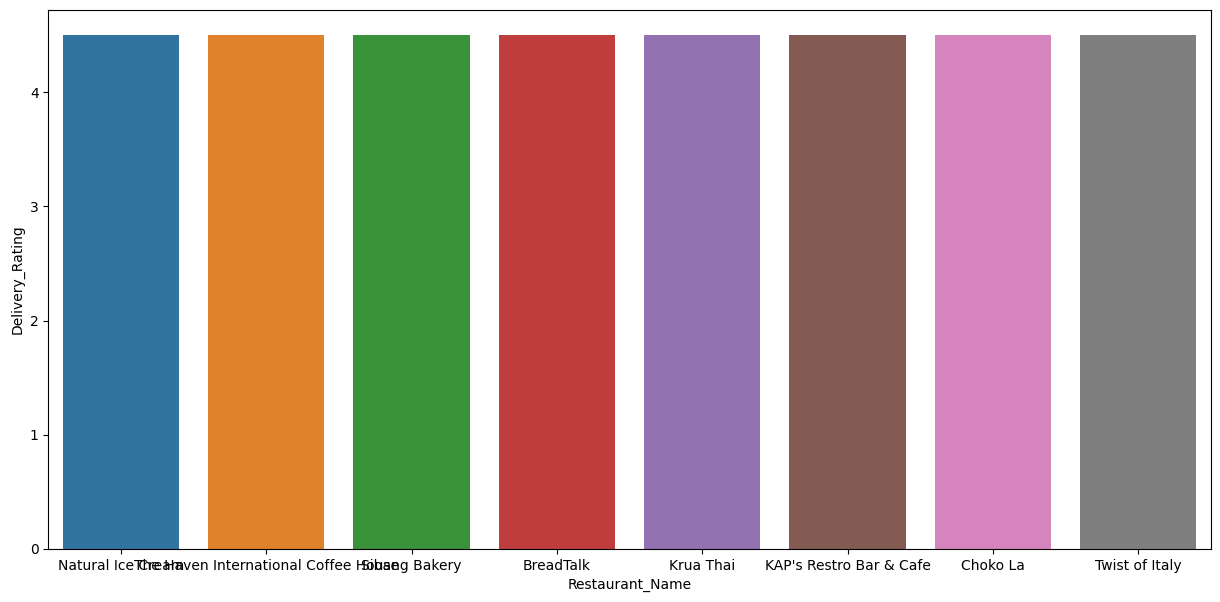

In [42]:
data['Delivery_Rating']=data['Delivery_Rating'].apply(float)
a=data['Restaurant_Name'][(data['Delivery_Rating']>=4.5)]
plt.figure(figsize=(15,7))
sns.barplot(x=a,y='Delivery_Rating',data=data)


Q3.What type of food is most preffered by the customers?

Ans: North Indian

In [44]:
data['Category'].value_counts()

North Indian                                                      88
North Indian, Chinese                                             39
North Indian, Mughlai                                             37
Pizza, Fast Food                                                  19
North Indian, Chinese, Mughlai                                    17
                                                                  ..
North Indian, Kebab, Mughlai, Biryani, Beverages                   1
North Indian, Continental, Italian, Chinese                        1
North Indian, Continental, Asian, Chinese                          1
Afghan, Iranian, Awadhi, Beverages                                 1
Cafe, North Indian, Chinese, Kashmiri, Rolls, Pizza, Beverages     1
Name: Category, Length: 1355, dtype: int64

<Axes: xlabel='Category', ylabel='count'>

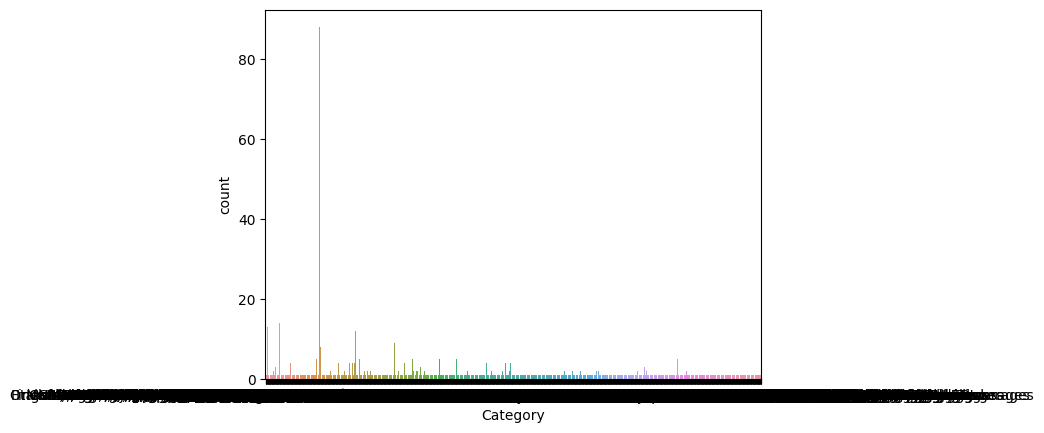

In [45]:
x=data['Category'].value_counts()
sns.countplot(x=data['Category'])

Q4.How many people prefer delivery rather than dining ?

In [46]:
y=data['Delivery_Rating_Count'].sum()
y2=data['Dining_Review_Count'].sum()
y-y2#People who prefer delivery rather than dining.

4534427

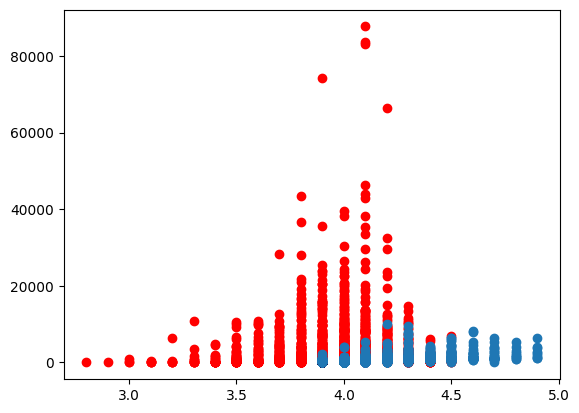

In [47]:
x_axis=data['Delivery_Rating']
y_axis=data['Delivery_Rating_Count']
x2_axis=data['Dining_Rating']
y2_axis=data['Dining_Review_Count']
plt.scatter(x_axis,y_axis,c='red')
plt.scatter(x2_axis,y2_axis)

plt.show()

Q5.Which restaurant is the best one having ratings more than 4.5 for dining?

In [48]:
b=data['Restaurant_Name'][(data['Dining_Rating']>=4.5)]
c=data[['Restaurant_Name','Dining_Review_Count']][(data['Dining_Rating']>=4.5)].sort_values('Dining_Review_Count')
c

,Restaurant_Name,Dining_Review_Count
42,Echoes Living Room,3
165,Only Bar Restaurant,91
93,Rooh,247
152,The Haven International Coffee House,282
158,Little Saigon,440
...,...,...
89,The Drunken Botanist,6302
4,The Big Chill,6487
20,Gulati,6509
51,AB's - Absolute Barbecues,8002


<Axes: xlabel='Restaurant_Name', ylabel='Dining_Review_Count'>

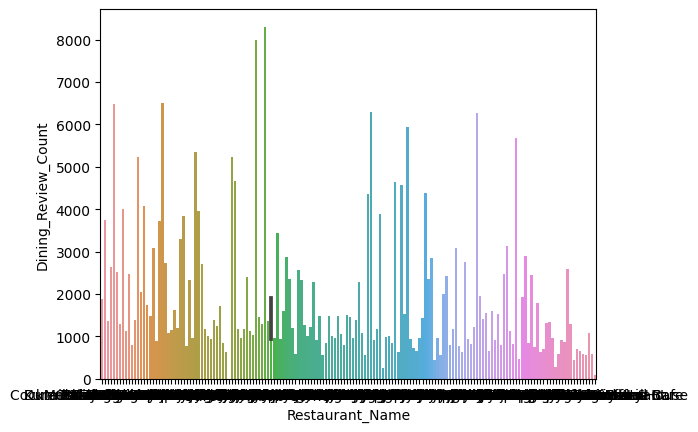

In [52]:
sns.barplot(x=b,y='Dining_Review_Count',data=data)

Q6.Compare different delivery rating counts of different restaurants.
Also tell that which restaurants has got the highest rating counts.
Do this by creating a barplot

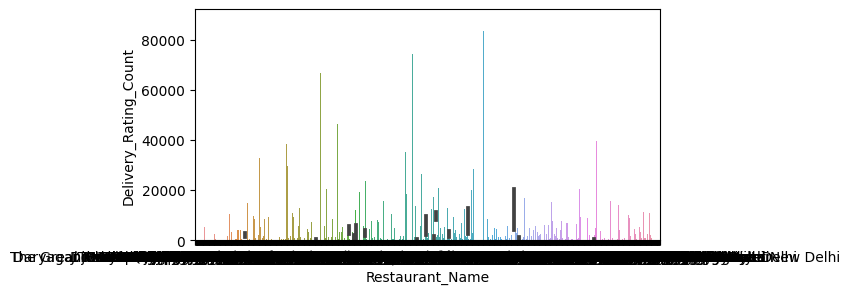

In [50]:
plt.figure(figsize=(6,3))
sns.barplot(x='Restaurant_Name',y='Delivery_Rating_Count',data=data)
plt.show()